<a href="https://colab.research.google.com/github/arminsoltan/mohaymen/blob/development/Phase02/Intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision
import torch
from torchvision import transforms
import pandas as pd
import warnings
import os
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Resize, Normalize, RandomHorizontalFlip 
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
warnings.filterwarnings("ignore")

In [3]:
!unzip "/content/drive/MyDrive/dataset/Intel.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Intel/seg_train/forest/14669.jpg  
  inflating: /content/Intel/seg_train/forest/14700.jpg  
  inflating: /content/Intel/seg_train/forest/14712.jpg  
  inflating: /content/Intel/seg_train/forest/14727.jpg  
  inflating: /content/Intel/seg_train/forest/14733.jpg  
  inflating: /content/Intel/seg_train/forest/1475.jpg  
  inflating: /content/Intel/seg_train/forest/14767.jpg  
  inflating: /content/Intel/seg_train/forest/14780.jpg  
  inflating: /content/Intel/seg_train/forest/14785.jpg  
  inflating: /content/Intel/seg_train/forest/14786.jpg  
  inflating: /content/Intel/seg_train/forest/14795.jpg  
  inflating: /content/Intel/seg_train/forest/14809.jpg  
  inflating: /content/Intel/seg_train/forest/14853.jpg  
  inflating: /content/Intel/seg_train/forest/14900.jpg  
  inflating: /content/Intel/seg_train/forest/14931.jpg  
  inflating: /content/Intel/seg_train/forest/14956.jpg  
  inflating: /content/Intel/seg_train/

In [4]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print("CUDA is not available")
else:
  print("CUDA is available")

CUDA is available


In [5]:
# Hyper-parameters
batch_size = 64
learning_rate = 0.1


In [6]:
# transform = transforms.Compose[transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
train_dir = '/content/Intel/seg_train'
test_dir = '/content/Intel/seg_test'
outcomes = os.listdir(train_dir)
print(outcomes)

['buildings', 'sea', 'glacier', 'forest', 'street', 'mountain']


In [7]:
nums = {}
for outcome in outcomes:
  nums[outcome] = len(os.listdir(train_dir + '/' + outcome))
image_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
image_per_class

,no. of images
buildings,2191
sea,2274
glacier,2404
forest,2271
street,2382
mountain,2512


In [8]:
nums_test = {}
outcomes_test = os.listdir(test_dir)
for outcome in outcomes_test:
  nums_test[outcome] = len(os.listdir(test_dir + '/' + outcome))
test_image_per_class = pd.DataFrame(nums_test.values(), index=nums_test.keys(), columns=["no. of test images"])
test_image_per_class

,no. of test images
buildings,437
sea,510
glacier,553
forest,474
street,501
mountain,525


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
transform_train = transforms.Compose([Resize((224, 224)),
                                      ToTensor(),
                                      Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

transform_test = transforms.Compose([Resize((224, 224)),
                                     ToTensor(),
                                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [10]:
train_data = ImageFolder(root=train_dir, transform=transform_train)
test_data = ImageFolder(root=test_dir, transform=transform_test)

In [11]:
batch_size = 64
valid_size = 0.2

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [12]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [13]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
valid_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)


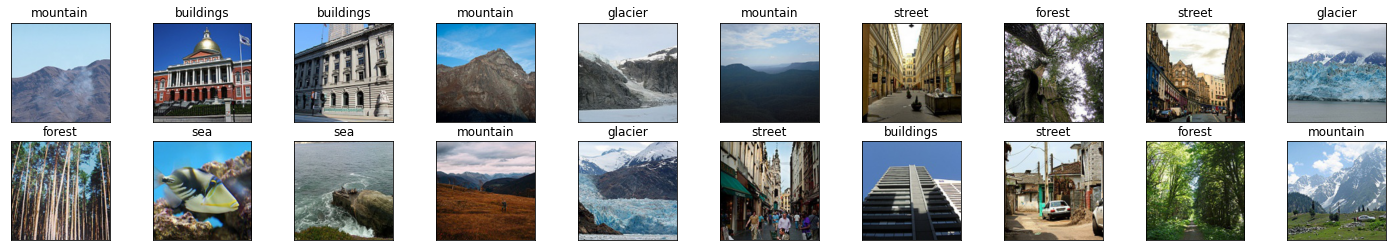

In [14]:
def imshow(image):
  image = image / 2 + 0.5
  plt.imshow(np.transpose(image, (1, 2, 0)))

dataiter = iter(train_dataloader)
images, labels = dataiter.next()
images = images.numpy()
classes = list(nums.keys())
classes.sort()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])

In [19]:
images, _ = dataiter.next()
print(images.shape)
conv1 = nn.Conv2d(3, 6, 5)
conv2 = nn.Conv2d(6, 16, 5)
conv3 = nn.Conv2d(32, 64, 3)
conv4 = nn.Conv2d(64, 128, 3)
conv5 = nn.Conv2d(128, 256, 3)
fc1 = nn.Linear(256, 128)
fc2 = nn.Linear(128, 16)
fc3 = nn.Linear(16, 6)
pool1 = nn.MaxPool2d(2, 2)
pool2 = nn.MaxPool2d(2, 2)
x = pool1(conv1(images))
print(x.shape)
x = pool1(conv2(x))
print(x.shape)
x = pool1(conv3(x))
print(x.shape)
x = pool1(conv4(x))
print(x.shape)
x = pool2(conv5(x))
print(x.shape)
x = x.view(x.size(0), -1)
print(x.shape)
# conv4 = nn.Conv2d(140, 180, 3, padding=1)
# x = conv4(x)
# x = x.view(-1, 16 * 106 * 106)
# print(x.shape)


torch.Size([64, 3, 224, 224])
torch.Size([64, 6, 110, 110])
torch.Size([64, 16, 53, 53])


RuntimeError: ignored

In [15]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
    self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
    self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
    self.pool1 = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(256 * 7 * 7, 1024)
    self.fc2 = nn.Linear(1024, 128)
    self.fc3 = nn.Linear(128, 6)
    self.dropout = nn.Dropout(0.4)
  
  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool1(F.relu(self.conv2(x)))
    x = self.pool1(F.relu(self.conv3(x)))
    x = self.pool1(F.relu(self.conv4(x)))
    x = self.pool1(F.relu(self.conv5(x)))
    x = x.view(x.size(0), -1)
    # x = self.dropout(x)
    x = F.relu(self.fc1(x))
    # x = self.dropout(x)
    x = F.relu(self.fc2(x))
    # x = self.dropout(x)
    x = self.fc3(x)
    return x

In [16]:
PATH = "/content/state_dict_model.pt"

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
from tqdm import tqdm

model = ConvNet().to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
schedular = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

In [19]:
num_epochs = 10
valid_loss_min = np.Inf

train_losses = []
valid_losses = []

In [24]:
n_total_steps = len(train_dataloader)
for epoch in tqdm(range(num_epochs)):
  
  train_loss = 0.0
  valid_loss = 0.0

  model.train()
  for i, (images, labels) in enumerate(train_dataloader):

    images, labels = images.to(device), labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item() * images.size(0)

  schedular.step()

  model.eval()
  for images, labels in valid_dataloader:
    
    images, labels = images.to(device), labels.to(device)
    
    outputs = model(images)

    loss = criterion(outputs, labels)

    valid_loss += loss.item() * images.size(0)

  # calculate average losses
  train_loss = train_loss / len(train_dataloader.sampler)
  valid_loss = valid_loss / len(valid_dataloader.sampler)
  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  print('Epoch: {} \tTraining Loss: {:.4f} \tValidation loss: {:.4f}'.format(
      epoch, train_loss, valid_loss
  ))

  if valid_loss <= valid_loss_min:
    valid_loss_min = valid_loss

  torch.save(model.state_dict(), PATH)

 10%|█         | 1/10 [00:47<07:09, 47.72s/it]

Epoch: 0 	Training Loss: 0.4840 	Validation loss: 0.7577


 20%|██        | 2/10 [01:34<06:20, 47.52s/it]

Epoch: 1 	Training Loss: 0.4354 	Validation loss: 0.8888


 30%|███       | 3/10 [02:23<05:34, 47.84s/it]

Epoch: 2 	Training Loss: 0.3866 	Validation loss: 0.6997


 40%|████      | 4/10 [03:10<04:45, 47.61s/it]

Epoch: 3 	Training Loss: 0.3299 	Validation loss: 0.7837


 50%|█████     | 5/10 [03:57<03:57, 47.47s/it]

Epoch: 4 	Training Loss: 0.2797 	Validation loss: 0.7131


 60%|██████    | 6/10 [04:45<03:10, 47.51s/it]

Epoch: 5 	Training Loss: 0.2367 	Validation loss: 0.8356


 70%|███████   | 7/10 [05:32<02:22, 47.46s/it]

Epoch: 6 	Training Loss: 0.2113 	Validation loss: 0.7336


 80%|████████  | 8/10 [06:19<01:34, 47.23s/it]

Epoch: 7 	Training Loss: 0.1579 	Validation loss: 0.9354


 90%|█████████ | 9/10 [07:07<00:47, 47.55s/it]

Epoch: 8 	Training Loss: 0.1223 	Validation loss: 0.9131


100%|██████████| 10/10 [07:54<00:00, 47.44s/it]

Epoch: 9 	Training Loss: 0.1002 	Validation loss: 0.8933


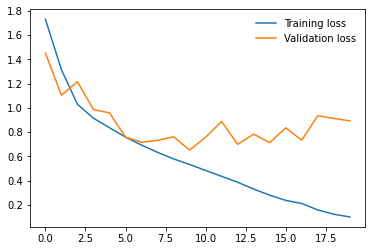

In [25]:
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [26]:
test_loss = 0.0

n_true = 0.0
n_total = 0.0
n_class_correct = [0 for i in range(6)]
n_class_sample = [0 for i in range(6)]

model.eval()
with torch.no_grad():
  
  for images, labels in test_dataloader:

    images, labels = images.to(device), labels.float().to(device)

    outputs = model(images)
    _, y_pred = torch.max(outputs, 1)

    n_true += (y_pred == labels).sum()
    n_total += labels.size(0)
    # print(outputs)
  print(n_total)
  print(float(n_true / n_total))


    

3000.0
0.7903333306312561


In [29]:
y_true = list()
y_pred = list()
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(6)]
  n_class_samples = [0 for i in range(6)]
  for images, labels in test_dataloader:
    images, labels = images.to(device), labels.float().to(device)

    outputs = model(images)

    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    # print(type(labels))
    for i in range(len(labels)):
      label = labels[i]
      y_true.append(label)
      # print(label.item())
      pred = predicted[i]
      y_pred.append(pred)
      # print(pred.item())
      if (label == pred):
        n_class_correct[int(label.item())] += 1
      n_class_samples[int(label.item())] += 1
  
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network: {acc:.2f} %')

  for i in range(6):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}:{acc:.2f} %')

Accuracy of the network: 79.03 %
Accuracy of forest:75.06 %
Accuracy of sea:88.82 %
Accuracy of street:73.60 %
Accuracy of mountain:74.29 %
Accuracy of buildings:81.18 %
Accuracy of glacier:82.04 %


In [41]:
from sklearn import metrics
import seaborn as sns

classes = ("forest", "sea", "street", "mountain", "buildings", "glacier", "ali")
y_true = np.array(y_true).reshape(3000, 1)
y_pred = np.array(y_pred).reshape(3000, 1)
print(y_true.shape, y_pred.shape)
cf_matrix = metrics.confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
plt.savefig('output.png')

(3000, 1) (3000, 1)


ValueError: ignored

In [ ]:
from sklearn.metrics import f1_score, recall_score

